In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable
import numpy as np
import importlib
import pandas as pd
from IPython.display import Image

import Transformer as tnsf
import detection_model as ad

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
importlib.reload(ad)

<module 'detection_model' from '/home/luisselvera/Documents/Anomaly_Detection_Transformers/detection_model.py'>

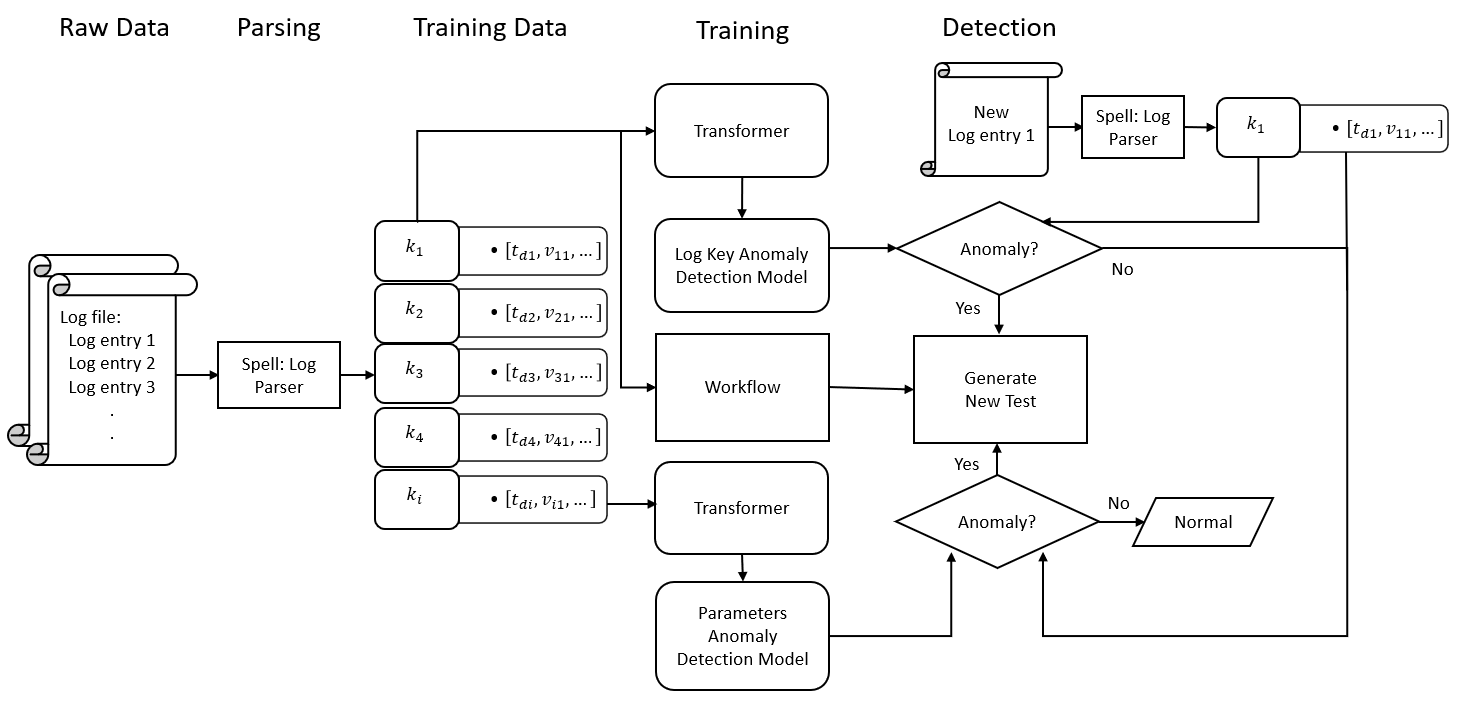

In [2]:
Image(filename="images/arch.PNG")

In [3]:
WINDOW_SIZE = 10
#VOCAB_SIZE = 30

In [4]:
#Parse from Elastic Search
es_ip = "149.165.168.205:9200"
machine = '54'
#start_date = '2019-10-24'
start_date = '2020-03-24'
start_time = '00:00'
#end_date = '2019-10-28'
end_date = '2020-03-26'
end_time = '23:59'
ad.parse(es_ip, machine, start_date, start_time, end_date, end_time)

Filtered logs: 83530
Total number of logs: 83530
Processed 100.0% of log lines.
Parsing done. [Time taken: 0:00:00.276786]


In [5]:
pd.options.display.width = 400
pd.options.display.max_colwidth = 400
log_structured = pd.read_csv("Spell_result/" +  "logs_structured.csv") 
log_structured[:6][["Log Key", "Content", "Message"]]

,Log Key,Content,Message
0,1,pam_unix(cron:session): session opened for user root by (uid=0),pam_unix <*> session session opened for user <*> by uid <*>
1,2,pam_unix(cron:session): session closed for user root,pam_unix <*> session session closed for user root
2,2,pam_unix(cron:session): session closed for user root,pam_unix <*> session session closed for user root
3,1,pam_unix(cron:session): session opened for user root by (uid=0),pam_unix <*> session session opened for user <*> by uid <*>
4,2,pam_unix(cron:session): session closed for user root,pam_unix <*> session session closed for user root
5,1,pam_unix(cron:session): session opened for user root by (uid=0),pam_unix <*> session session opened for user <*> by uid <*>


In [6]:
log_structured[:5]

,LineId,Month,Day,Time,Machine,Level,Content,Log Key,Message,ParameterList
0,1,Oct,23,15:17:01,bigdata-vm-54,CRON[16837],pam_unix(cron:session): session opened for user root by (uid=0),1,pam_unix <*> session session opened for user <*> by uid <*>,"['cron', 'root', '0']"
1,2,Oct,23,15:17:01,bigdata-vm-54,CRON[16837],pam_unix(cron:session): session closed for user root,2,pam_unix <*> session session closed for user root,['cron']
2,3,Oct,23,15:17:01,bigdata-vm-54,CRON[16837],pam_unix(cron:session): session closed for user root,2,pam_unix <*> session session closed for user root,['cron']
3,4,Oct,23,15:17:01,bigdata-vm-54,CRON[16837],pam_unix(cron:session): session opened for user root by (uid=0),1,pam_unix <*> session session opened for user <*> by uid <*>,"['cron', 'root', '0']"
4,5,Oct,23,16:17:00,bigdata-vm-54,CRON[18640],pam_unix(cron:session): session closed for user root,2,pam_unix <*> session session closed for user root,['cron']


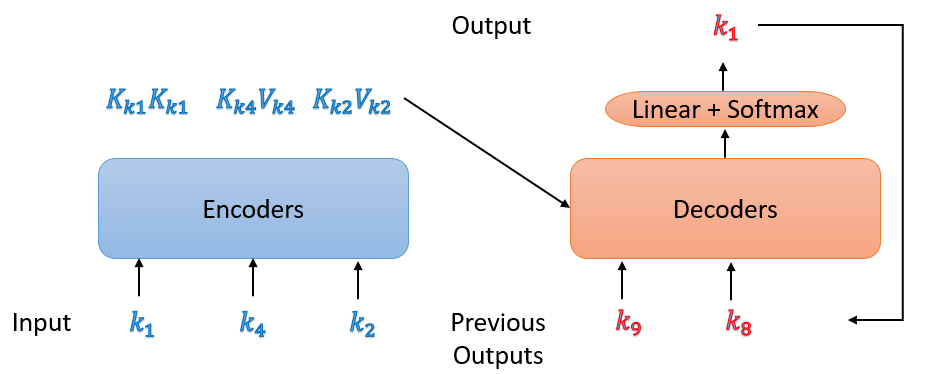

In [7]:
Image(filename="images/flow.png")

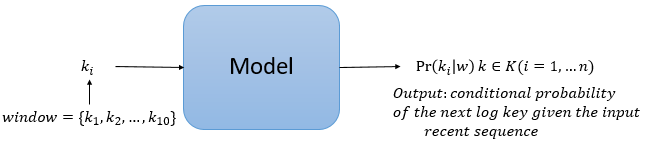

In [8]:
Image(filename="images/training.png")

In [9]:
model = ad.train()
# model = tnsf.make_model(vocab_size, vocab_size, N=2)
# model.load_state_dict(torch.load("Model/model.pt"))

/home/luisselvera/.local/lib/python3.7/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Epoch Step: 1 Loss: 3.252569 Tokens per Sec: 131.954239
Epoch Step: 1 Loss: 0.577525 Tokens per Sec: 2406.625977
tensor(0.5775)
Epoch Step: 1 Loss: 1.058642 Tokens per Sec: 1251.806885
Epoch Step: 1 Loss: 0.467310 Tokens per Sec: 1817.210693
tensor(0.4673)
Epoch Step: 1 Loss: 0.822229 Tokens per Sec: 1102.491943
Epoch Step: 1 Loss: 0.397055 Tokens per Sec: 1982.709961
tensor(0.3971)
Epoch Step: 1 Loss: 0.537895 Tokens per Sec: 1032.621948
Epoch Step: 1 Loss: 0.291790 Tokens per Sec: 2009.160767
tensor(0.2918)
Epoch Step: 1 Loss: 0.911298 Tokens per Sec: 979.333435
Epoch Step: 1 Loss: 0.375334 Tokens per Sec: 2283.627197
tensor(0.3753)
Epoch Step: 1 Loss: 0.422428 Tokens per Sec: 1024.079956
Epoch Step: 1 Loss: 0.322454 Tokens per Sec: 2001.896729
tensor(0.3225)
Epoch Step: 1 Loss: 0.893978 Tokens per Sec: 1042.784668
Epoch Step: 1 Loss: 0.345717 Tokens per Sec: 1817.868286
tensor(0.3457)
Epoch Step: 1 Loss: 0.466363 Tokens per Sec: 1102.064697
Epoch Step: 1 Loss: 0.295181 Tokens per Se

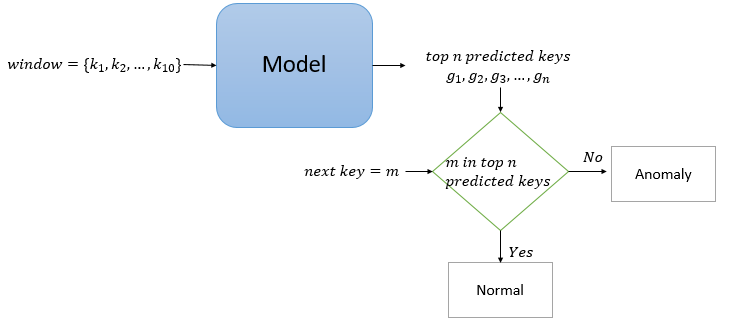

In [8]:
Image(filename="images/detection.png")

In [10]:
log_keys = list(map(lambda n: n, map(int, open("Spell_result/np.txt").readline().split())))
len(log_keys)

1200

In [11]:
log_keys[20:40]

[2, 1, 2, 1, 1, 1, 2, 2, 5, 6, 7, 5, 6, 8, 8, 7, 9, 10, 9, 10]

In [73]:
model.eval()

#Sequence for Elastic Search
sequence = log_keys[:20]
x = sequence[0:WINDOW_SIZE]
y = sequence[WINDOW_SIZE:WINDOW_SIZE*2]

#Sequence for HDFS
#test_normal_loader = generate_input("hdfs_test_normal")
#test_abnormal_loader = generate_input("hdfs_test_abnormal")

#sequence=test_normal_loader[0:1][:]
#sequence=test_abnormal_loader[3:4][:]

# x = sequence[0][0:WINDOW_SIZE]
# y = sequence[0][WINDOW_SIZE+1:WINDOW_SIZE*2]

print("Sequence: ", sequence)
print("Souce:", x)
print("Label:", y)

Sequence:  [1, 2, 2, 1, 2, 1, 2, 1, 3, 4, 4, 3, 1, 1, 2, 2, 1, 2, 2, 1]
Souce: [1, 2, 2, 1, 2, 1, 2, 1, 3, 4]
Label: [4, 3, 1, 1, 2, 2, 1, 2, 2, 1]


In [74]:
src_mask = Variable(torch.ones(1, 1, WINDOW_SIZE+1) )
t1 = torch.from_numpy(np.zeros((1,WINDOW_SIZE+1),dtype=int))
t2 = torch.from_numpy(np.zeros((1,WINDOW_SIZE+1),dtype=int))

t1[0][1:WINDOW_SIZE+1] = torch.tensor(x, dtype=torch.float).to(device)
t2[0][0:len(y)] = torch.tensor(y, dtype=torch.float).to(device)
t1[0][0]=1

src = Variable(t1, requires_grad=False)
tgt = Variable(t2, requires_grad=False)
#Abnormal
FP = 0
TN = 0

pred = tnsf.greedy_decode(model, src, src_mask, tgt, max_len=WINDOW_SIZE+1, start_symbol=1) 
if -1 in pred:
    print("Abnormal: false positive")
    FP += 1
else:
    print("Normal: true negative")
    TN += 1
print(sequence)


label:  tensor(4)
predicted: tensor([19,  3,  6, 13, 18, 12,  2,  1,  4])
next_key: tensor([4])

label:  tensor(3)
predicted: tensor([13,  7, 14,  6,  8, 18,  2, 17,  3])
next_key: tensor([3])

label:  tensor(1)
predicted: tensor([17,  7,  6, 18, 15,  4,  2, 13,  1])
next_key: tensor([1])

label:  tensor(1)
predicted: tensor([ 9,  3, 14,  5, 15,  4, 13,  1,  2])
next_key: tensor([2])

label:  tensor(2)
predicted: tensor([15,  7,  5,  3, 14,  4, 13,  1,  2])
next_key: tensor([2])

label:  tensor(2)
predicted: tensor([15,  7,  3,  5, 14,  4, 13,  2,  1])
next_key: tensor([1])

label:  tensor(1)
predicted: tensor([ 6,  7, 14,  9, 13,  4,  5,  1,  2])
next_key: tensor([2])

label:  tensor(2)
predicted: tensor([ 3, 15,  7, 14,  5, 13,  4,  2,  1])
next_key: tensor([1])

label:  tensor(2)
predicted: tensor([14, 15,  7,  9, 13,  4,  5,  1,  2])
next_key: tensor([2])

label:  tensor(1)
predicted: tensor([14,  3,  5,  7, 15, 13,  4,  2,  1])
next_key: tensor([1])
Normal: true negative
[1, 2, 2

In [75]:
#Sequence for Elastic Search
sequence = log_keys[1180:1200]
x = sequence[0:WINDOW_SIZE]
y = sequence[WINDOW_SIZE:WINDOW_SIZE*2]

print("Sequence: ", sequence)
print("Souce:", x)
print("Label:", y)

src_mask = Variable(torch.ones(1, 1, WINDOW_SIZE+1) )
t1 = torch.from_numpy(np.zeros((1,WINDOW_SIZE+1),dtype=int))
t2 = torch.from_numpy(np.zeros((1,WINDOW_SIZE+1),dtype=int))

t1[0][1:WINDOW_SIZE+1] = torch.tensor(x, dtype=torch.float).to(device)
t2[0][0:len(y)] = torch.tensor(y, dtype=torch.float).to(device)
t1[0][0]=1

src = Variable(t1, requires_grad=False)
tgt = Variable(t2, requires_grad=False)
#Abnormal
FP = 0
TN = 0

pred = tnsf.greedy_decode(model, src, src_mask, tgt, max_len=WINDOW_SIZE+1, start_symbol=1) 
if -1 in pred:
    print("Normal: true negative")
    FP += 1
else:
    print("Abnormal: false positive")
    TN += 1
print(sequence)

Sequence:  [4, 16, 8, 8, 6, 5, 6, 5, 7, 7, 10, 10, 4, 16, 16, 4, 1, 2, 1, 2]
Souce: [4, 16, 8, 8, 6, 5, 6, 5, 7, 7]
Label: [10, 10, 4, 16, 16, 4, 1, 2, 1, 2]

label:  tensor(10)
predicted: tensor([ 6,  7, 18, 19,  2,  4, 12, 13,  1])
next_key: tensor([1])
Normal: true negative
[4, 16, 8, 8, 6, 5, 6, 5, 7, 7, 10, 10, 4, 16, 16, 4, 1, 2, 1, 2]


In [76]:
log_template = pd.read_csv("Spell_result/" + "logs_templates.csv") 
log_template

,Log Key,Message,Occurrences
0,1,pam_unix <*> session session opened for user <*> by uid <*>,308
1,2,pam_unix <*> session session closed for user root,288
2,10,Failed password for <*> <*> <*> from <*> port <*> ssh2,88
3,5,pam_unix sshd auth check pass; user unknown,66
4,8,pam_unix sshd auth authentication failure; logname uid <*> euid <*> tty ssh ruser rhost <*>,52
5,4,Disconnected from <*> port <*>,42
6,16,Received disconnect from <*> port <*> <*> disconnected by user,38
7,7,Invalid user <*> from <*>,38
8,6,input_userauth_request invalid user <*> [preauth],38
9,9,Connection <*> by <*> port <*> [preauth],28
